In [76]:
import numpy as np
# Se importan las librerias a usar y se espcifica un numero maximo de filas y columnas
import pandas as pd
import scipy.stats as sp

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [77]:
SEXO = {'Masculino': 1,
        'Femenino': 2
        }

diagnosticos_nombres = [
    'Reflujo Gastroesofágico sin esofagitis',
    'Desnutrición proteicocalórica',
    'Pérdida anormal de peso',
    'Trastorno neurosensorial de la deglución',
    'Gastroenteritis',
    'Esofagitis Eosinofílica',
    'Diarrea persistente',
    'Enfermedad Celiaca',
    'Reflujo Gastroesofágico con esofagitis',
    'Trastorno de la succión',
    'Disfagia',
    'Enfermedad de Hirschprung',
    'Laringomalacia',
    'Alergia a la proteína de leche de vaca',
    'Otra'
]

# Leer datos:
DIAGNOSTICOS_GI = np.array([])
TRATAMIENTO_GI = np.array([])
DIAGNOSTICO_FINAL = np.array([])

for i in range(1, 16):
    x = "dx_gi___" + str(i)
    DIAGNOSTICOS_GI = np.append(DIAGNOSTICOS_GI, x)

for i in range(1, 19):
    x = "tx___" + str(i)
    TRATAMIENTO_GI = np.append(TRATAMIENTO_GI, x)


for i in range(1, 13):
    x = "dx___" + str(i)
    DIAGNOSTICO_FINAL = np.append(DIAGNOSTICO_FINAL, x)

COLUMNAS_RELEVANTES = np.array(['edad', 'sexo', 'peso', 'talla', 'imc', 'pc', 'otrodx_gi', 'otrodx'])

# Concatenar los tres arrays
COLUMNAS_RELEVANTES = np.concatenate((COLUMNAS_RELEVANTES, DIAGNOSTICOS_GI, TRATAMIENTO_GI, DIAGNOSTICO_FINAL))

# Datos estudio:
df_1537 = pd.read_csv("./DATOS/SECEC2021019Protocol_DATA_2023-12-19_1537.csv", encoding='utf-8')
df_1538 = pd.read_csv("./DATOS/SECEC2021019Protocol_DATA_2023-12-19_1538.csv", encoding='utf-8')
df_1538_LABELS = pd.read_csv("./DATOS/SECEC2021019Protocol_DATA_LABELS_2023-12-19_1538.csv", encoding='utf-8')

In [78]:
df_1537 =  df_1537[COLUMNAS_RELEVANTES]
df_1538 =  df_1538[COLUMNAS_RELEVANTES]

In [79]:
df_1537.isnull().sum() / df_1537.shape[0]

edad       0.289474
sexo       0.250000
peso       0.328947
talla      0.328947
imc        0.342105
             ...   
dx___8     0.000000
dx___9     0.000000
dx___10    0.000000
dx___11    0.000000
dx___12    0.000000
Length: 53, dtype: float64

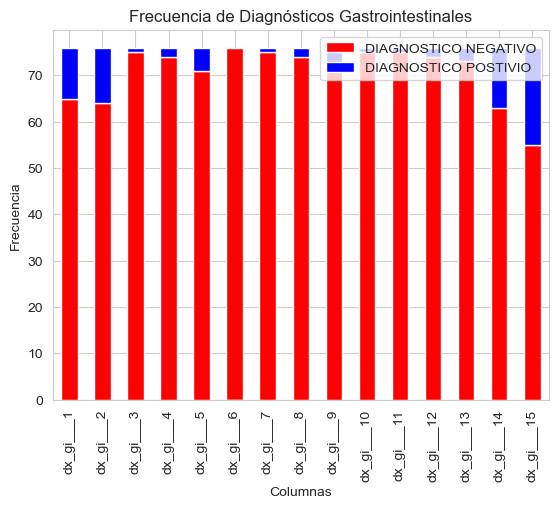

In [80]:
# Prevalencia
# Graficar la frecuencia de 1 y 0
# Seleccionar solo las columnas 'dx_gi___1' a 'dx_gi___15'
columnas_dx_gi = df_1537.loc[:, 'dx_gi___1':'dx_gi___15']

# Graficar la frecuencia de 1 y 0 en las columnas seleccionadas
frecuencia_total = columnas_dx_gi.apply(pd.Series.value_counts).transpose()
frecuencia_total.plot(kind='bar', stacked=True, color=['red', 'blue'])

# Configurar el gráfico
plt.title('Frecuencia de Diagnósticos Gastrointestinales')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.legend(['DIAGNOSTICO NEGATIVO', 'DIAGNOSTICO POSTIVIO'], loc='upper right')
plt.show()


In [81]:
# Prevalencias sobre el total de la población:

#Total de la población:
total = len(columnas_dx_gi)

# Enfermedad por Reflujo Gastroesofágico sin esofagitis:
prevalencia_dx_gi___1 = len((columnas_dx_gi['dx_gi___1'][columnas_dx_gi['dx_gi___1'] == 1]))/total

# Desnutrición proteicocalórica:
prevalencia_dx_gi___2 = len((columnas_dx_gi['dx_gi___2'][columnas_dx_gi['dx_gi___2'] == 1]))/total

# Pérdida anormal de peso
prevalencia_dx_gi___3 = len((columnas_dx_gi['dx_gi___3'][columnas_dx_gi['dx_gi___3'] == 1]))/total

# Trastorno neurosensorial de la deglución
prevalencia_dx_gi___4 = len((columnas_dx_gi['dx_gi___4'][columnas_dx_gi['dx_gi___4'] == 1]))/total

# Gastroenteritis
prevalencia_dx_gi___5 = len((columnas_dx_gi['dx_gi___5'][columnas_dx_gi['dx_gi___5'] == 1]))/total

# Esofagitis Eosinofílica
prevalencia_dx_gi___6 = len((columnas_dx_gi['dx_gi___6'][columnas_dx_gi['dx_gi___6'] == 1]))/total

# Diarrea persistente
prevalencia_dx_gi___7 = len((columnas_dx_gi['dx_gi___7'][columnas_dx_gi['dx_gi___7'] == 1]))/total

# Enfermedad Celiaca
prevalencia_dx_gi___8 = len((columnas_dx_gi['dx_gi___8'][columnas_dx_gi['dx_gi___8'] == 1]))/total

# Enfermedad por Reflujo Gastroesofágico con esofagitis
prevalencia_dx_gi___9 = len((columnas_dx_gi['dx_gi___9'][columnas_dx_gi['dx_gi___9'] == 1]))/total

# Trastorno de la succión
prevalencia_dx_gi___10 = len((columnas_dx_gi['dx_gi___10'][columnas_dx_gi['dx_gi___10'] == 1]))/total

# Disfagia
prevalencia_dx_gi___11 = len((columnas_dx_gi['dx_gi___11'][columnas_dx_gi['dx_gi___11'] == 1]))/total

# Enfermedad de Hirschprung
prevalencia_dx_gi___12 = len((columnas_dx_gi['dx_gi___12'][columnas_dx_gi['dx_gi___12'] == 1]))/total

# Laringomalacia
prevalencia_dx_gi___13 = len((columnas_dx_gi['dx_gi___13'][columnas_dx_gi['dx_gi___13'] == 1]))/total

# Alergia a la proteína de leche de vaca
prevalencia_dx_gi___14 = len((columnas_dx_gi['dx_gi___14'][columnas_dx_gi['dx_gi___14'] == 1]))/total

# Otros
prevalencia_dx_gi___15 = len((columnas_dx_gi['dx_gi___15'][columnas_dx_gi['dx_gi___15'] == 1]))/total

res = {
    'Diagnostico' : diagnosticos_nombres,
    'Prevalencia': [prevalencia_dx_gi___1,
                    prevalencia_dx_gi___2,
                    prevalencia_dx_gi___3,
                    prevalencia_dx_gi___4,
                    prevalencia_dx_gi___5,
                    prevalencia_dx_gi___6,
                    prevalencia_dx_gi___7,
                    prevalencia_dx_gi___8,
                    prevalencia_dx_gi___9,
                    prevalencia_dx_gi___10,
                    prevalencia_dx_gi___11,
                    prevalencia_dx_gi___12,
                    prevalencia_dx_gi___13,
                    prevalencia_dx_gi___14,
                    prevalencia_dx_gi___15]
    
}

df_resultado = pd.DataFrame(res)

df_resultado


,Diagnostico,Prevalencia
0,Reflujo Gastroesofágico sin esofagitis,0.144737
1,Desnutrición proteicocalórica,0.157895
2,Pérdida anormal de peso,0.013158
3,Trastorno neurosensorial de la deglución,0.026316
4,Gastroenteritis,0.065789
5,Esofagitis Eosinofílica,0.000000
6,Diarrea persistente,0.013158
7,Enfermedad Celiaca,0.026316
8,Reflujo Gastroesofágico con esofagitis,0.052632
9,Trastorno de la succión,0.013158


Text(0.5, 1.0, 'Prevalencia de Diagnósticos')

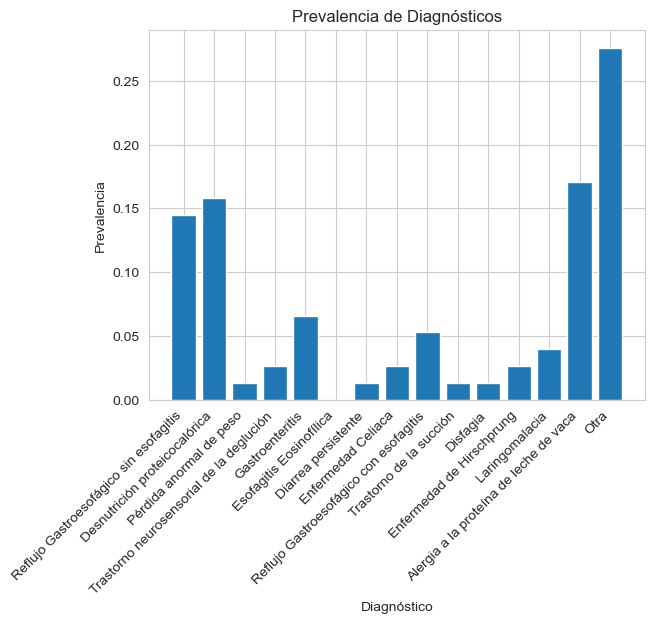

In [82]:
# Crear un gráfico de barras
plt.bar(df_resultado['Diagnostico'], df_resultado['Prevalencia'])

# Rotar los nombres de las categorías en el eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas y título
plt.xlabel('Diagnóstico')
plt.ylabel('Prevalencia')
plt.title('Prevalencia de Diagnósticos')



/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_12755/2090633580.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df_resultado_hombres['Diagnostico'], rotation=45, ha='right')
/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_12755/2090633580.py:164: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df_resultado_mujeres['Diagnostico'], rotation=45, ha='right')


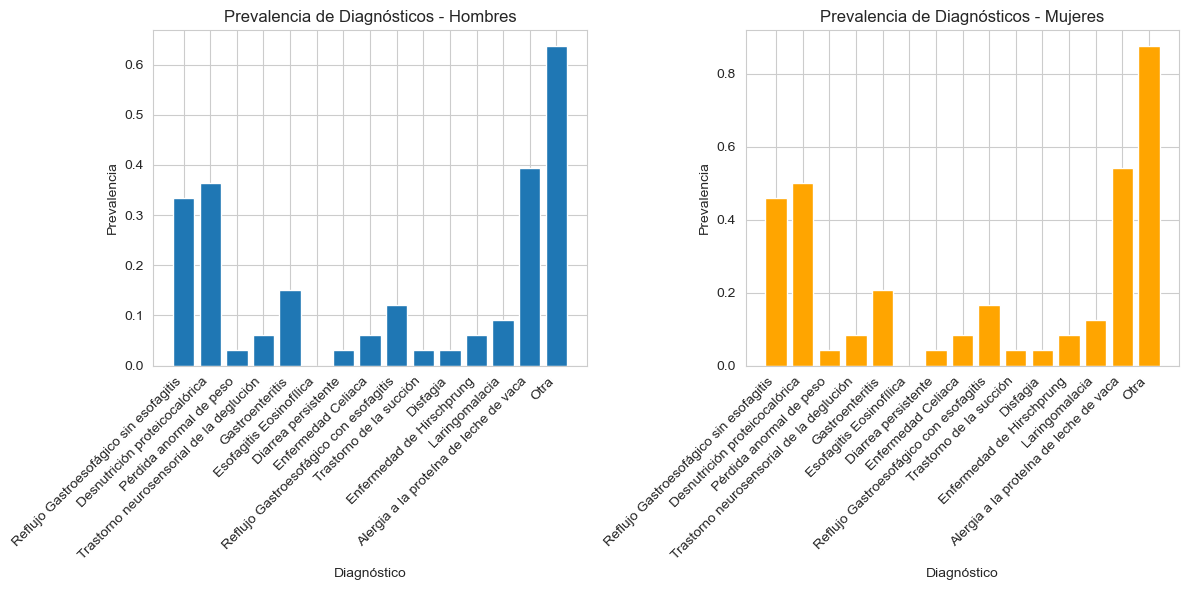

In [83]:
# Prevalencia por sexo:

# Eliminar los registros con valores nulos en la columna de sexo
df_sin_nulos_sexo = df_1537.dropna(subset=['sexo'])

# Seleccionar solo las columnas 'dx_gi___1' a 'dx_gi___15'
columnas_dx_gi = df_sin_nulos_sexo.loc[:, 'dx_gi___1':'dx_gi___15']

# Hombres
total_hombres = len(df_sin_nulos_sexo[df_sin_nulos_sexo['sexo'] == 1])

# Enfermedad por Reflujo Gastroesofágico sin esofagitis:
prevalencia_dx_gi___1 = len((columnas_dx_gi['dx_gi___1'][columnas_dx_gi['dx_gi___1'] == 1]))/total_hombres

# Desnutrición proteicocalórica:
prevalencia_dx_gi___2 = len((columnas_dx_gi['dx_gi___2'][columnas_dx_gi['dx_gi___2'] == 1]))/total_hombres

# Pérdida anormal de peso
prevalencia_dx_gi___3 = len((columnas_dx_gi['dx_gi___3'][columnas_dx_gi['dx_gi___3'] == 1]))/total_hombres

# Trastorno neurosensorial de la deglución
prevalencia_dx_gi___4 = len((columnas_dx_gi['dx_gi___4'][columnas_dx_gi['dx_gi___4'] == 1]))/total_hombres

# Gastroenteritis
prevalencia_dx_gi___5 = len((columnas_dx_gi['dx_gi___5'][columnas_dx_gi['dx_gi___5'] == 1]))/total_hombres

# Esofagitis Eosinofílica
prevalencia_dx_gi___6 = len((columnas_dx_gi['dx_gi___6'][columnas_dx_gi['dx_gi___6'] == 1]))/total_hombres

# Diarrea persistente
prevalencia_dx_gi___7 = len((columnas_dx_gi['dx_gi___7'][columnas_dx_gi['dx_gi___7'] == 1]))/total_hombres

# Enfermedad Celiaca
prevalencia_dx_gi___8 = len((columnas_dx_gi['dx_gi___8'][columnas_dx_gi['dx_gi___8'] == 1]))/total_hombres

# Enfermedad por Reflujo Gastroesofágico con esofagitis
prevalencia_dx_gi___9 = len((columnas_dx_gi['dx_gi___9'][columnas_dx_gi['dx_gi___9'] == 1]))/total_hombres

# Trastorno de la succión
prevalencia_dx_gi___10 = len((columnas_dx_gi['dx_gi___10'][columnas_dx_gi['dx_gi___10'] == 1]))/total_hombres

# Disfagia
prevalencia_dx_gi___11 = len((columnas_dx_gi['dx_gi___11'][columnas_dx_gi['dx_gi___11'] == 1]))/total_hombres

# Enfermedad de Hirschprung
prevalencia_dx_gi___12 = len((columnas_dx_gi['dx_gi___12'][columnas_dx_gi['dx_gi___12'] == 1]))/total_hombres

# Laringomalacia
prevalencia_dx_gi___13 = len((columnas_dx_gi['dx_gi___13'][columnas_dx_gi['dx_gi___13'] == 1]))/total_hombres

# Alergia a la proteína de leche de vaca
prevalencia_dx_gi___14 = len((columnas_dx_gi['dx_gi___14'][columnas_dx_gi['dx_gi___14'] == 1]))/total_hombres

# Otros
prevalencia_dx_gi___15 = len((columnas_dx_gi['dx_gi___15'][columnas_dx_gi['dx_gi___15'] == 1]))/total_hombres

res = {
    'Diagnostico' : diagnosticos_nombres,
    'Prevalencia': [prevalencia_dx_gi___1,
                    prevalencia_dx_gi___2,
                    prevalencia_dx_gi___3,
                    prevalencia_dx_gi___4,
                    prevalencia_dx_gi___5,
                    prevalencia_dx_gi___6,
                    prevalencia_dx_gi___7,
                    prevalencia_dx_gi___8,
                    prevalencia_dx_gi___9,
                    prevalencia_dx_gi___10,
                    prevalencia_dx_gi___11,
                    prevalencia_dx_gi___12,
                    prevalencia_dx_gi___13,
                    prevalencia_dx_gi___14,
                    prevalencia_dx_gi___15]

}

df_resultado_hombres = pd.DataFrame(res)

# Mujeres:
total_mujeres = len(df_sin_nulos_sexo[df_sin_nulos_sexo['sexo'] == 2])

# Enfermedad por Reflujo Gastroesofágico sin esofagitis:
prevalencia_dx_gi___1 = len((columnas_dx_gi['dx_gi___1'][columnas_dx_gi['dx_gi___1'] == 1]))/total_mujeres

# Desnutrición proteicocalórica:
prevalencia_dx_gi___2 = len((columnas_dx_gi['dx_gi___2'][columnas_dx_gi['dx_gi___2'] == 1]))/total_mujeres

# Pérdida anormal de peso
prevalencia_dx_gi___3 = len((columnas_dx_gi['dx_gi___3'][columnas_dx_gi['dx_gi___3'] == 1]))/total_mujeres

# Trastorno neurosensorial de la deglución
prevalencia_dx_gi___4 = len((columnas_dx_gi['dx_gi___4'][columnas_dx_gi['dx_gi___4'] == 1]))/total_mujeres

# Gastroenteritis
prevalencia_dx_gi___5 = len((columnas_dx_gi['dx_gi___5'][columnas_dx_gi['dx_gi___5'] == 1]))/total_mujeres

# Esofagitis Eosinofílica
prevalencia_dx_gi___6 = len((columnas_dx_gi['dx_gi___6'][columnas_dx_gi['dx_gi___6'] == 1]))/total_mujeres

# Diarrea persistente
prevalencia_dx_gi___7 = len((columnas_dx_gi['dx_gi___7'][columnas_dx_gi['dx_gi___7'] == 1]))/total_mujeres

# Enfermedad Celiaca
prevalencia_dx_gi___8 = len((columnas_dx_gi['dx_gi___8'][columnas_dx_gi['dx_gi___8'] == 1]))/total_mujeres

# Enfermedad por Reflujo Gastroesofágico con esofagitis
prevalencia_dx_gi___9 = len((columnas_dx_gi['dx_gi___9'][columnas_dx_gi['dx_gi___9'] == 1]))/total_mujeres

# Trastorno de la succión
prevalencia_dx_gi___10 = len((columnas_dx_gi['dx_gi___10'][columnas_dx_gi['dx_gi___10'] == 1]))/total_mujeres

# Disfagia
prevalencia_dx_gi___11 = len((columnas_dx_gi['dx_gi___11'][columnas_dx_gi['dx_gi___11'] == 1]))/total_mujeres

# Enfermedad de Hirschprung
prevalencia_dx_gi___12 = len((columnas_dx_gi['dx_gi___12'][columnas_dx_gi['dx_gi___12'] == 1]))/total_mujeres

# Laringomalacia
prevalencia_dx_gi___13 = len((columnas_dx_gi['dx_gi___13'][columnas_dx_gi['dx_gi___13'] == 1]))/total_mujeres

# Alergia a la proteína de leche de vaca
prevalencia_dx_gi___14 = len((columnas_dx_gi['dx_gi___14'][columnas_dx_gi['dx_gi___14'] == 1]))/total_mujeres

# Otros
prevalencia_dx_gi___15 = len((columnas_dx_gi['dx_gi___15'][columnas_dx_gi['dx_gi___15'] == 1]))/total_mujeres

res = {
    'Diagnostico' : diagnosticos_nombres,
    'Prevalencia': [prevalencia_dx_gi___1,
                    prevalencia_dx_gi___2,
                    prevalencia_dx_gi___3,
                    prevalencia_dx_gi___4,
                    prevalencia_dx_gi___5,
                    prevalencia_dx_gi___6,
                    prevalencia_dx_gi___7,
                    prevalencia_dx_gi___8,
                    prevalencia_dx_gi___9,
                    prevalencia_dx_gi___10,
                    prevalencia_dx_gi___11,
                    prevalencia_dx_gi___12,
                    prevalencia_dx_gi___13,
                    prevalencia_dx_gi___14,
                    prevalencia_dx_gi___15]

}

df_resultado_mujeres = pd.DataFrame(res)


# Comparación gráfica de las prevalencias:

# Crear una figura con dos subgráficos (uno al lado del otro)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico de barras - Prevalencia para los Hombres:
axs[0].bar(df_resultado_hombres['Diagnostico'], df_resultado_hombres['Prevalencia'])
axs[0].set_xticklabels(df_resultado_hombres['Diagnostico'], rotation=45, ha='right')
axs[0].set_xlabel('Diagnóstico')
axs[0].set_ylabel('Prevalencia')
axs[0].set_title('Prevalencia de Diagnósticos - Hombres')

# Segundo gráfico de barras
axs[1].bar(df_resultado_mujeres['Diagnostico'], df_resultado_mujeres['Prevalencia'], color='orange')  
axs[1].set_xticklabels(df_resultado_mujeres['Diagnostico'], rotation=45, ha='right')
axs[1].set_xlabel('Diagnóstico')
axs[1].set_ylabel('Prevalencia')
axs[1].set_title('Prevalencia de Diagnósticos - Mujeres')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [84]:
# Agregar genero:
df_resultado_hombres['Género'] = 'Masculino'
df_resultado_mujeres['Género'] = 'Femenino'

df_resultado_total = pd.concat([df_resultado_hombres, df_resultado_mujeres], ignore_index=True)

# Ordenar las filas por el nombre
df_resultado_total = df_resultado_total.sort_values(by='Diagnostico')

df_resultado_total

,Diagnostico,Prevalencia,Género
28,Alergia a la proteína de leche de vaca,0.541667,Femenino
13,Alergia a la proteína de leche de vaca,0.393939,Masculino
1,Desnutrición proteicocalórica,0.363636,Masculino
16,Desnutrición proteicocalórica,0.500000,Femenino
21,Diarrea persistente,0.041667,Femenino
6,Diarrea persistente,0.030303,Masculino
25,Disfagia,0.041667,Femenino
10,Disfagia,0.030303,Masculino
22,Enfermedad Celiaca,0.083333,Femenino
7,Enfermedad Celiaca,0.060606,Masculino


In [85]:
df_resultado_hombres

,Diagnostico,Prevalencia,Género
0,Reflujo Gastroesofágico sin esofagitis,0.333333,Masculino
1,Desnutrición proteicocalórica,0.363636,Masculino
2,Pérdida anormal de peso,0.030303,Masculino
3,Trastorno neurosensorial de la deglución,0.060606,Masculino
4,Gastroenteritis,0.151515,Masculino
5,Esofagitis Eosinofílica,0.000000,Masculino
6,Diarrea persistente,0.030303,Masculino
7,Enfermedad Celiaca,0.060606,Masculino
8,Reflujo Gastroesofágico con esofagitis,0.121212,Masculino
9,Trastorno de la succión,0.030303,Masculino


In [86]:
df_resultado_mujeres

,Diagnostico,Prevalencia,Género
0,Reflujo Gastroesofágico sin esofagitis,0.458333,Femenino
1,Desnutrición proteicocalórica,0.500000,Femenino
2,Pérdida anormal de peso,0.041667,Femenino
3,Trastorno neurosensorial de la deglución,0.083333,Femenino
4,Gastroenteritis,0.208333,Femenino
5,Esofagitis Eosinofílica,0.000000,Femenino
6,Diarrea persistente,0.041667,Femenino
7,Enfermedad Celiaca,0.083333,Femenino
8,Reflujo Gastroesofágico con esofagitis,0.166667,Femenino
9,Trastorno de la succión,0.041667,Femenino


In [87]:
# Varianza de la prevalencia de los diagnosticos para hombres y mujeres:

varianza_prevalencia_hombres = sp.variation(df_resultado_hombres['Prevalencia'])

varianza_prevalencia_mujeres = sp.variation(df_resultado_mujeres['Prevalencia'])

print('Varianza de la prevalencia de diagnosticos para los hombres:', varianza_prevalencia_hombres)
print('Varianza de la prevalencia de diagnosticos para los mujeres:', varianza_prevalencia_mujeres)


Varianza de la prevalencia de diagnosticos para los hombres: 1.1232349646318491
Varianza de la prevalencia de diagnosticos para los mujeres: 1.123234964631849


In [88]:
# Desviación estandar de la prevalencia de los diagnosticos para hombres:

std_prevalencia_hombres = sp.tstd(df_resultado_hombres['Prevalencia'])

std_prevalencia_mujeres = sp.tstd(df_resultado_mujeres['Prevalencia'])

print('Desviación estandar de la prevalencia de diagnosticos para los hombres:', varianza_prevalencia_hombres)
print('Desviación estandar de la prevalencia de diagnosticos para los mujeres:', varianza_prevalencia_mujeres)


Desviación estandar de la prevalencia de diagnosticos para los hombres: 1.1232349646318491
Desviación estandar de la prevalencia de diagnosticos para los mujeres: 1.123234964631849
